Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between the dependent variable and one or more independent features by fitting a linear equation to observed data.

When there is only one independent feature, it is known as Simple Linear Regression, and when there are more than one feature, it is known as Multiple Linear Regression.

Similarly, when there is only one dependent variable, it is considered Univariate Linear Regression, while when there are more than one dependent variables, it is known as Multivariate Regression.

Assumptions of <b>Simple Linear Regression</b> (When just a single feature and 1 target variable)
Linear regression is a powerful tool for understanding and predicting the behavior of a variable, however, it needs to meet a few conditions in order to be accurate and dependable solutions. 

Linearity: The independent and dependent variables have a linear relationship with one another. This implies that changes in the dependent variable follow those in the independent variable(s) in a linear fashion. This means that there should be a straight line that can be drawn through the data points. If the relationship is not linear, then linear regression will not be an accurate model.

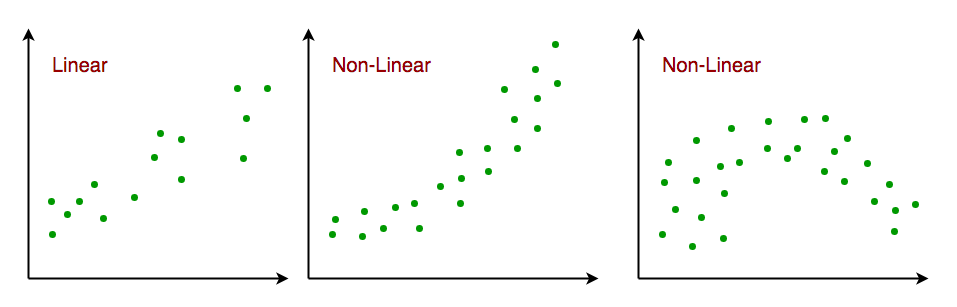

Independence: The observations in the dataset are independent of each other. This means that the value of the dependent variable for one observation does not depend on the value of the dependent variable for another observation. If the observations are not independent, then linear regression will not be an accurate model.

Homoscedasticity in Linear Regression: Across all levels of the independent variable(s), the variance of the errors is constant. This indicates that the amount of the independent variable(s) has no impact on the variance of the errors. If the variance of the residuals is not constant, then linear regression will not be an accurate model.
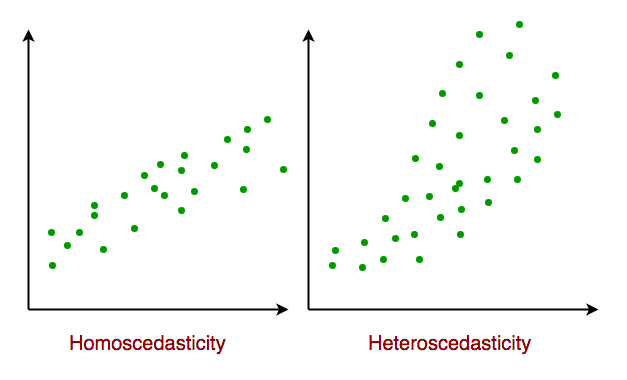

Normality:Residual is the difference between actual and predicted values. The residuals should be normally distributed. This means that the residuals should follow a bell-shaped curve. If the residuals are not normally distributed, then linear regression will not be an accurate model.

Assumptions of <b>Multiple Linear Regression</b> (When multiple features and 1 target variable)

For Multiple Linear Regression, all four of the assumptions from Simple Linear Regression apply. In addition to this, below are few more:

No multicollinearity: There is no high correlation between the independent variables. This indicates that there is little or no correlation between the independent variables. Multicollinearity occurs when two or more independent variables are highly correlated with each other, which can make it difficult to determine the individual effect of each variable on the dependent variable. If there is multicollinearity, then multiple linear regression will not be an accurate model.
    
Additivity: The model assumes that the effect of changes in a predictor variable on the response variable is consistent regardless of the values of the other variables. This assumption implies that there is no interaction between variables in their effects on the dependent variable.
    
Feature Selection: In multiple linear regression, it is essential to carefully select the independent variables that will be included in the model. Including irrelevant or redundant variables may lead to overfitting and complicate the interpretation of the model.
    
Overfitting: Overfitting occurs when the model fits the training data too closely, capturing noise or random fluctuations that do not represent the true underlying relationship between variables. This can lead to poor generalization performance on new, unseen data.

Detecting Multicollinearity includes two techniques:

Correlation Matrix: Examining the correlation matrix among the independent variables is a common way to detect multicollinearity. High correlations (close to 1 or -1) indicate potential multicollinearity.

VIF (Variance Inflation Factor): VIF is a measure that quantifies how much the variance of an estimated regression coefficient increases if your predictors are correlated. A high VIF (typically above 10) suggests multicollinearity.

Evaluation Metrics for Linear Regression:

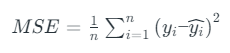

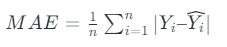

RSME is not as good of a metric as R-squared. Root Mean Squared Error can fluctuate when the units of the variables vary since its value is dependent on the variables’ units (it is not a normalized measure).
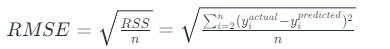

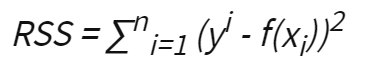

RSE is computed by dividing the RSS by the number of observations in the sample less 2, and then taking the square root: RSE = [RSS/(n-2)]1/2

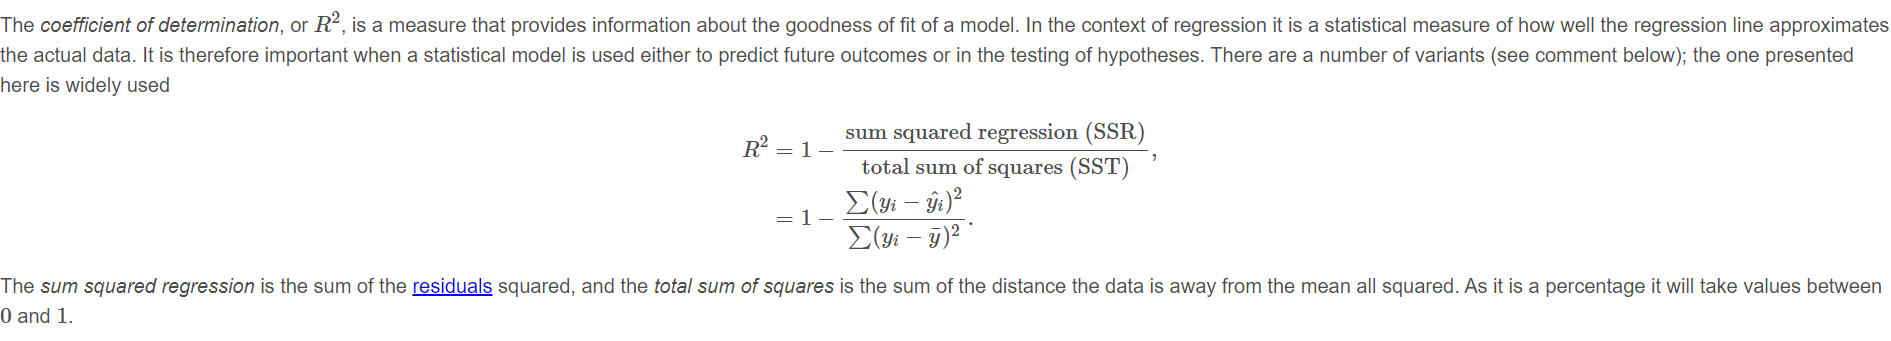

https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
df = pd.read_csv(url)
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [4]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [5]:
df = df.dropna()

<AxesSubplot:xlabel='x', ylabel='y'>

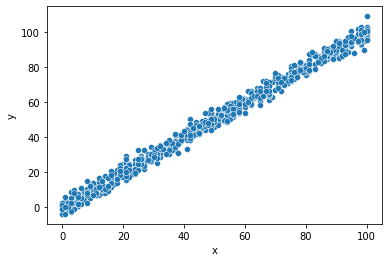

In [6]:
sns.scatterplot(data = df, x = 'x', y = 'y')

In [7]:
y_mean = np.mean(df['y'])
y_std = np.std(df['y'])
x_mean = np.mean(df['x'])
x_std = np.std(df['x'])

In [8]:
x = np.array(df['x'])
x = x.reshape(-1,1)
y = np.array(df['y'])

In [9]:
x = (x-x_mean)/x_std
y = (y-y_mean)/y_std

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [12]:
x_train.shape

(559, 1)

In [13]:
import random
def initialise(dim):
    b = random.random()
    w = np.random.rand(dim)
    return w,b

In [14]:
w,b = initialise(1)
print('w = ', w, ', b = ',b)

w =  [0.05464305] , b =  0.5641823190365618


In [15]:
def cost(x,y,w,b):
    m = x.shape[0]
    y_pred = b+ np.dot(x,w)
    cost = np.sum((y-y_pred)**2)/(2*m)
    return cost

In [16]:
cost(x_train,y_train,w,b)

0.6132885961097779

In [17]:
def update_param(x,y,w,b,learning_rate):
    m = x.shape[0]
    y_pred = np.dot(x,w)+b
    dw = (np.dot(y_pred-y,x))/m
    db = np.sum(y_pred-y)/m
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w,b

In [18]:
w,b

(array([0.05464305]), 0.5641823190365618)

In [19]:
w,b = update_param(x_train,y_train,w,b,0.01)

In [20]:
w,b

(array([0.06409611]), 0.5583922131952055)

In [21]:
cost(x_train,y_train,w,b)

0.6010620649502924

In [22]:
def lin_reg(X,Y,lr,epochs):
    dim = X.shape[1]
    w,b = initialise(dim)
    ct = cost(X,Y,w,b);
    cost_list = []
    it_list = []
    for i in range(1,epochs+1):
        w,b = update_param(X,Y,w,b,lr)
        cost_list.append(cost(X,Y,w,b))
        it_list.append(i)
    df = pd.DataFrame({'Cost':cost_list,'Iteration':it_list})
    return w,b,df

In [23]:
w_final,b_final,df = lin_reg(x_train,y_train,0.01,1000)

In [24]:
df

,Cost,Iteration
0,0.237340,1
1,0.232685,2
2,0.228124,3
3,0.223653,4
4,0.219272,5
...,...,...
995,0.004658,996
996,0.004658,997
997,0.004658,998
998,0.004658,999


<AxesSubplot:xlabel='Iteration', ylabel='Cost'>

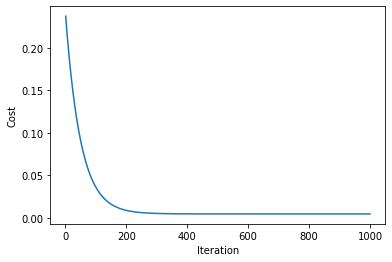

In [25]:
sns.lineplot(data = df, x = 'Iteration', y = 'Cost')

In [40]:
w_final,b_final

(array([0.9965002]), -0.000380246316912138)

In [27]:
def pred(x,w,b):
    return np.dot(x,w)+b

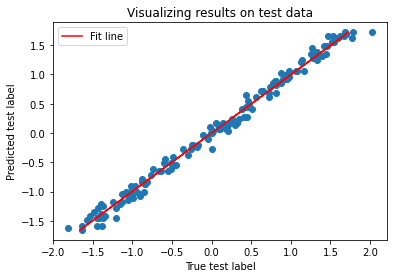

In [28]:
plt.title("Visualizing results on test data")
plt.plot(x_test,pred(x_test,w_final,b_final),'r',label = 'Fit line')
plt.scatter(y_test,pred(x_test,w_final,b_final))
plt.xlabel("True test label")
plt.legend()
plt.ylabel("Predicted test label")
plt.show()

<AxesSubplot:ylabel='Count'>

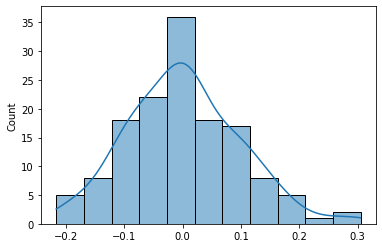

In [32]:
sns.histplot(y_test - pred(x_test,w_final,b_final),kde = True)

In [30]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [31]:
y_pred = pred(x_test,w_final,b_final)
print("MAE: ",mae(y_pred,y_test))
print("MSE: ",mse(y_pred,y_test))
print("r2: ",r2(y_pred,y_test))

MAE:  0.07475677813897393
MSE:  0.009234622679614298
r2:  0.9908688490472991


In [41]:
w_final,b_final

(array([0.9965002]), -0.000380246316912138)

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print("MAE: ",mae(predictions,y_test))
print("MSE: ",mse(predictions,y_test))
print("r2: ",r2(predictions,y_test))

MAE:  0.07476012844093916
MSE:  0.009234978634087027
r2:  0.9908690120910546


In [42]:
model.coef_,model.intercept_

(array([0.9965283]), -0.0003862843779994622)

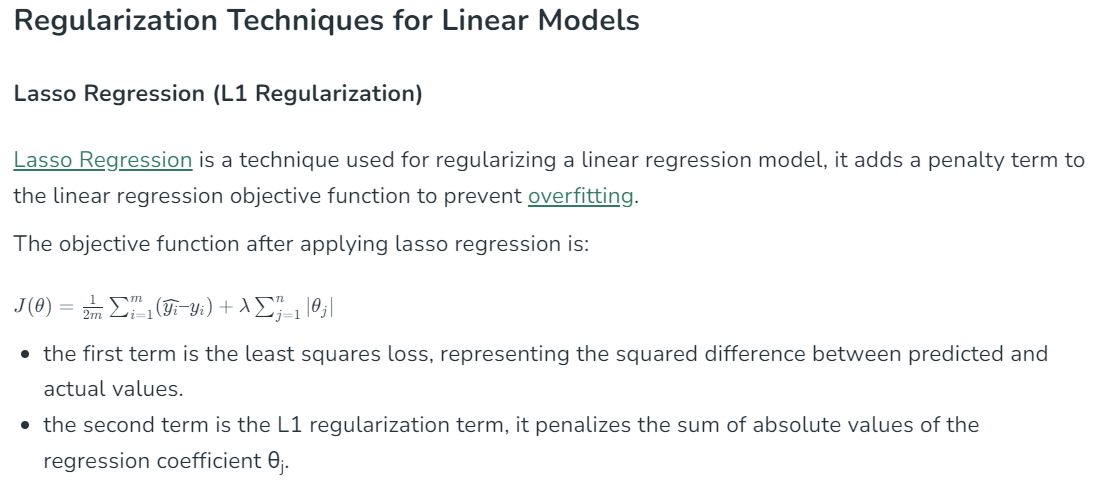

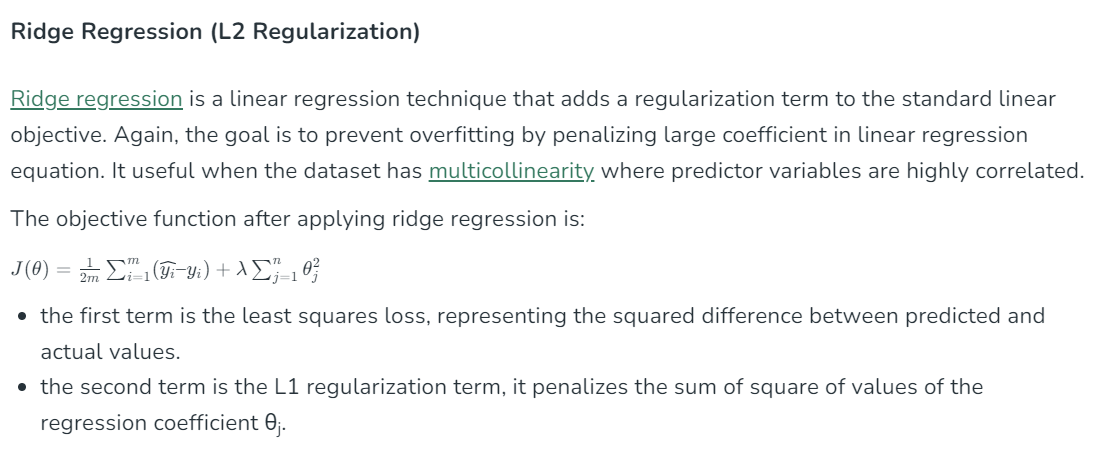

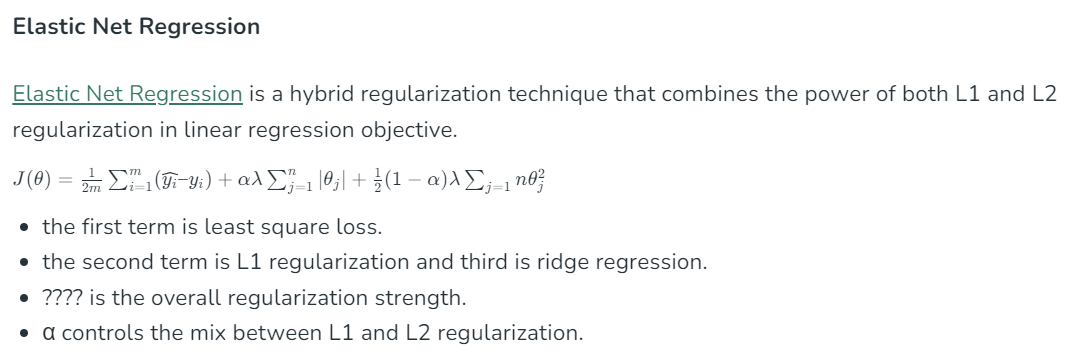

Multiple Linear Regression implementation:

In [54]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.25)

In [63]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_mean = np.mean(y)
y_std = np.std(y)
y_train = (y_train-y_mean)/y_std
y_test = (y_test-y_mean)/y_std

In [73]:
import random
def initialise(X):
    b = random.random()
    w = np.random.rand(X.shape[1])
    return w,b

In [75]:
w,b = initialise(x_train)
print(w,b)

[0.68802907 0.50687767 0.31207643 0.67116918 0.13908141 0.43800136
 0.04198706 0.53530385 0.00717459 0.07647964 0.16379382 0.69095417
 0.69854027] 0.8004502076905385


In [76]:
def cost(X,Y,w,b):
    m = X.shape[0]
    y_pred = np.dot(X,w)+b
    return np.sum((y_pred-Y)**2)/(2*m)

In [77]:
cost(x_train,y_train,w,b)

1.8499662316283565

In [79]:
def update_param(X,Y,w,b,lr):
    y_pred = np.dot(X,w) + b
    m = X.shape[0]
    dw = np.dot(y_pred - Y,X)/m
    db = np.sum(y_pred - Y)/m
    w = w - lr*dw
    b = b - lr*db
    return w,b

In [80]:
w,b = update_param(x_train,y_train,w,b,0.01)
print(w,b)
print(cost(x_train,y_train,w,b))

[ 6.77914662e-01  5.07907655e-01  3.03795019e-01  6.66715664e-01
  1.32748788e-01  4.45440033e-01  3.59687522e-02  5.37399775e-01
 -5.71404759e-04  6.76987235e-02  1.57122016e-01  6.91070580e-01
  6.86948214e-01] 0.7927178464124107
1.7812147567025431


In [83]:
def lin_reg(X,Y,lr,epochs):
    w,b = initialise(X)
    cost_list = []
    it_list = []
    for i in range (1,epochs+1):
        w,b = update_param(X,Y,w,b,lr)
        ct = cost(X,Y,w,b)
        cost_list.append(ct)
        it_list.append(i)
    cost_df = pd.DataFrame({'Cost':cost_list,'Iteration':it_list})
    return w,b,cost_df

In [84]:
w_final,b_final,cost_df = lin_reg(x_train,y_train,0.01,1000)

In [90]:
def predict(X,w,b):
    return np.dot(X,w)+b

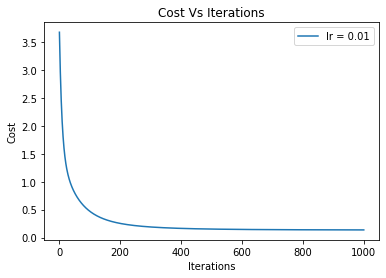

In [89]:
plt.plot(cost_df['Iteration'],cost_df['Cost'],label= 'lr = 0.01')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Vs Iterations')
plt.legend()

In [91]:
predictions = predict(x_test,w_final,b_final)

<AxesSubplot:ylabel='Count'>

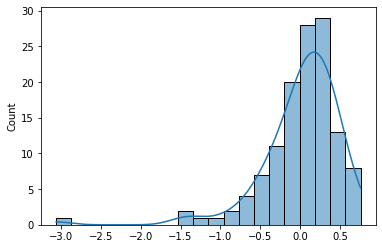

In [93]:
sns.histplot(predictions - y_test,kde = True)

As per one of the assumptions of Linear Regression , in order to perform fairly the residuals should be normally distributed but the distribution in our case is negatively skewed

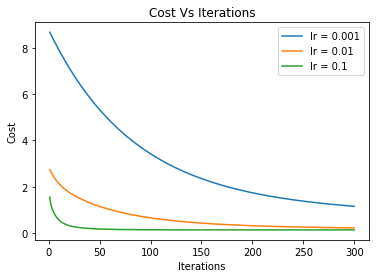

In [106]:
w_final_1, b_final_1, cost_df_1 = lin_reg(x_train,y_train,0.001,300)
w_final_2, b_final_2, cost_df_2 = lin_reg(x_train,y_train,0.01,300)
w_final_3, b_final_3, cost_df_3 = lin_reg(x_train,y_train,0.1,300)
plt.plot(cost_df_1['Iteration'],cost_df_1['Cost'],label= 'lr = 0.001')
plt.plot(cost_df_2['Iteration'],cost_df_2['Cost'],label= 'lr = 0.01')
plt.plot(cost_df_3['Iteration'],cost_df_3['Cost'],label= 'lr = 0.1')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Vs Iterations')
plt.legend()

In [95]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [96]:
print("mae : ", mae(predictions,y_test))
print("mse : ", mse(predictions,y_test))
print("r2 : ", r2_score(predictions,y_test))

mae :  0.34457795188774226
mse :  0.24958714677393798
r2 :  0.6374893481626216


In [97]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("mae : ", mae(y_pred,y_test))
print("mse : ", mse(y_pred,y_test))
print("r2 : ", r2_score(y_pred,y_test))

mae :  0.33712939083985083
mse :  0.24455719706012338
r2 :  0.648689462126


In [98]:
print(w_final,b_final)

[-0.11686089  0.13234817  0.0951901   0.08247844 -0.18521332  0.35368123
 -0.0337138  -0.2851441   0.43314977 -0.42274003 -0.21039339  0.10661582
 -0.35385236] 0.027227208175263636


In [100]:
print(model.coef_,model.intercept_)

[-0.12670938  0.14612012  0.00759982  0.09214772 -0.23938672  0.3183774
 -0.03835105 -0.38525395  0.34392844 -0.27186068 -0.21537087  0.09983535
 -0.37129936] 0.027214079877762642


Bias Variance Analysis

In [101]:
print("mae : ", mae(predict(x_train,w_final,b_final),y_train))
print("mse : ", mse(predict(x_train,w_final,b_final),y_train))
print("r2 : ", r2_score(predict(x_train,w_final,b_final),y_train))

mae :  0.3681639196967598
mse :  0.27320580253147125
r2 :  0.6564869008175177


Upon checking the model performance on both training and test set , It performs fairly on both and it can be concluded there is no overfitting as very low variance and low bias. Model can be made a bit complex by feature engineering. Polynomial Regression can be done . Regularization may be performed.